In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC, LinearSVC

In [99]:
pd.set_option("display.max_columns", 30)

In [100]:
train_data= pd.read_csv("SalaryData_Train(1).csv")
test_data= pd.read_csv("SalaryData_Test(1).csv")

In [101]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [103]:
train_data.shape

(30161, 14)

In [104]:
test_data.shape

(15060, 14)

In [105]:
combine_data= pd.concat([train_data, test_data], ignore_index= True)
combine_data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
combine_data.shape

(45221, 14)

In [107]:
temp_df= combine_data.pop('age')
combine_data['age']= temp_df
combine_data.head()

,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,39
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,38
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,53
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,28


In [108]:
combine_data['workclass'] = combine_data['workclass'].astype('category')
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   workclass      45221 non-null  category
 1   education      45221 non-null  object  
 2   educationno    45221 non-null  int64   
 3   maritalstatus  45221 non-null  object  
 4   occupation     45221 non-null  object  
 5   relationship   45221 non-null  object  
 6   race           45221 non-null  object  
 7   sex            45221 non-null  object  
 8   capitalgain    45221 non-null  int64   
 9   capitalloss    45221 non-null  int64   
 10  hoursperweek   45221 non-null  int64   
 11  native         45221 non-null  object  
 12  Salary         45221 non-null  object  
 13  age            45221 non-null  int64   
dtypes: category(1), int64(5), object(8)
memory usage: 4.5+ MB


In [109]:
combine_data['workclass'].unique()

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
Categories (7, object): [' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

In [110]:
def object_mapping(x):
    if x== 's ':
        return 1
    elif x== 'h ':
        return 2
    elif x== 'd ':
        return 3
    elif x== 'o ':
        return 4

In [111]:
combine_data['workclass']= combine_data['workclass'].apply(object_mapping)

In [112]:
combine_data= combine_data.drop(['workclass'], axis=1)

In [113]:
combine_data.describe()

,educationno,capitalgain,capitalloss,hoursperweek,age
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,10.118463,1101.454700,88.548617,40.938038,38.548086
std,2.552909,7506.511295,404.838249,12.007640,13.217981
min,1.000000,0.000000,0.000000,1.000000,17.000000
25%,9.000000,0.000000,0.000000,40.000000,28.000000
50%,10.000000,0.000000,0.000000,40.000000,37.000000
75%,13.000000,0.000000,0.000000,45.000000,47.000000
max,16.000000,99999.000000,4356.000000,99.000000,90.000000


In [116]:
combine_data.dtypes

education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
age              category
dtype: object

In [115]:
combine_data['age']=combine_data['age'].astype('category')
combine_data['education']=combine_data['education'].astype('category')
combine_data['maritalstatus']=combine_data['maritalstatus'].astype('category')
combine_data['occupation']=combine_data['occupation'].astype('category')
combine_data['relationship']=combine_data['relationship'].astype('category')
combine_data['race']=combine_data['race'].astype('category')
combine_data['native']=combine_data['native'].astype('category')
combine_data['sex']=combine_data['sex'].astype('category')

In [117]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [118]:
combine_data['Salary'] = label_encoder.fit_transform(combine_data['Salary'])

In [119]:
combine_data.Salary

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45219    0
45220    1
Name: Salary, Length: 45221, dtype: int32

In [121]:
combine_data['age'] = label_encoder.fit_transform(combine_data['age'])
combine_data['education'] = label_encoder.fit_transform(combine_data['education'])
combine_data['maritalstatus'] = label_encoder.fit_transform(combine_data['maritalstatus'])
combine_data['occupation'] = label_encoder.fit_transform(combine_data['occupation'])
combine_data['relationship'] = label_encoder.fit_transform(combine_data['relationship'])
combine_data['race'] = label_encoder.fit_transform(combine_data['race'])
combine_data['sex'] = label_encoder.fit_transform(combine_data['sex'])
combine_data['native'] = label_encoder.fit_transform(combine_data['native'])

In [122]:
combine_data

,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age
0,9,13,4,0,1,4,1,2174,0,40,37,0,22
1,9,13,2,3,0,4,1,0,0,13,37,0,33
2,11,9,0,5,1,4,1,0,0,40,37,0,21
3,1,7,2,5,0,2,1,0,0,40,37,0,36
4,9,13,2,9,5,2,0,0,0,40,4,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,9,13,4,9,3,4,1,0,0,40,37,0,16
45217,9,13,0,9,1,4,0,0,0,36,37,0,22
45218,9,13,2,9,0,4,1,0,0,50,37,0,21
45219,9,13,0,0,3,1,1,5455,0,40,37,0,27


In [30]:
def plot_continuous_variable(x):
    hist, ax = plt.subplots(figsize=(6,4))
    ax = sns.distplot(combine_data[x])
    plt.show()

C:\Users\naray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


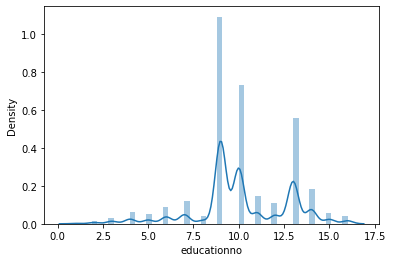

C:\Users\naray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


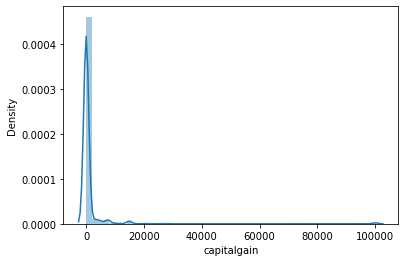

C:\Users\naray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


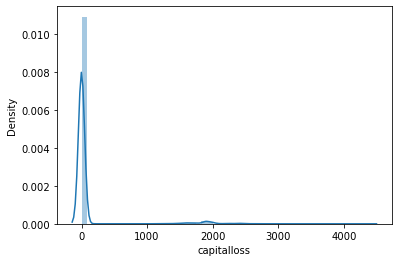

C:\Users\naray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


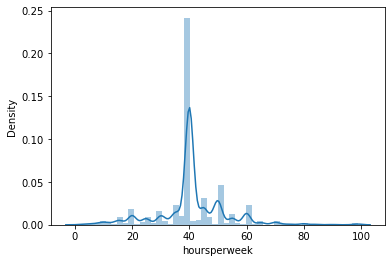

C:\Users\naray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


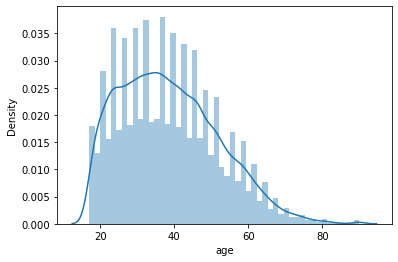

In [31]:
for col in combine_data.select_dtypes(["int64", "float64"]):
    plot_continuous_variable(col)

In [34]:
X= combine_data.iloc[:,:-1]
Y= pd.DataFrame(combine_data.iloc[:,-1])

In [57]:
continuous_features= []
for features in combine_data.select_dtypes(["int64", "float64"]):
    continuous_features.append(features)

In [59]:
scaled_data= combine_data
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
scaled_data[continuous_features]= minmax.fit_transform(scaled_data[continuous_features].values)

In [60]:
scaled_data.head()

,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age
0,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K,0.301370
1,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K,0.452055
2,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K,0.287671
3,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K,0.493151
4,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K,0.150685


In [80]:
scaled_X= X_reduced
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
scaled_X= pd.DataFrame((scaled_X))

In [81]:
scaled_X

""


In [83]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

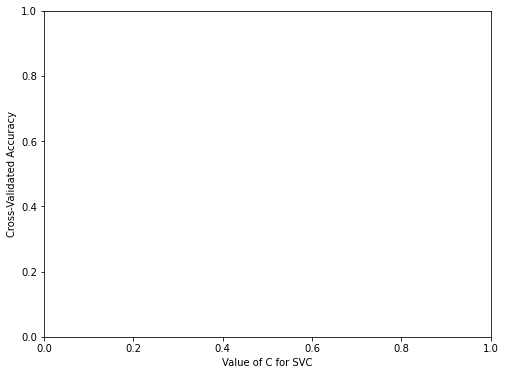

In [89]:
figure= plt.figure(figsize= (8,6))
axes= figure.add_subplot(1,1,1)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV
Cs= [0.001, 0.01, 0.1, 1, 10]
gammas= [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}